## TP4 : Calcul de sensibilités

In [3]:
import  numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt 

### Question 1 : 

In [4]:
def simule_w(T):
    G = np.random.randn()
    return np.sqrt(T)*G 

def payoff(x , W , r , sigma , K , T):
    return max(x*np.exp((r - sigma**2 /2)*T + sigma*W) - K , 0)


def calcul_delta(sigma , T ,spot , K , r) :
    d_1 = (1/sigma*np.sqrt(T))*(np.log(spot / K)  + ( r+ sigma**2/2)*T ) 
    return norm.cdf(d_1)

def mehode_differance_fin(spot , n , T  , r , sigma , K , epsilon) :
    """ 
    """
    # epsilon = n**(- 1/4)
    alpha_1 = 0 
    alpha_2 = 0 
    for _ in range(n) :
        W = simule_w(T )
        alpha_1+=payoff(spot + epsilon , W , r , sigma , K ,T )
        alpha_2+=payoff(spot - epsilon , W , r , sigma , K ,T )

    return (alpha_1 - alpha_2)*np.exp(-r*T) / (2*epsilon*n)

def methode_rapport_vraisemblanc(T , n , spot , r , sigma , K):
    """ 
    """
    res = 0
    for _ in range(n):
        W = simule_w(T)
        res+=payoff(spot , W , r , sigma , K , T)*W / (sigma*T*spot)
    
    return res*np.exp(-r*T)/n 

def methode_derivation(n , T , r , sigma , spot , K):
    """ 
    
    """
    res = 0 
    for _ in range(n) :
        W = simule_w(T)
        res+=np.exp((r - sigma**2 /2)*T + sigma*W)*int(payoff(spot , W , r , sigma , K ,T) > 0)

    return res*np.exp(-r*T)/n 





### Question 2 : 

In [5]:
# Test 
T = 1
r = 0.03
K = 100
spot = 100
sigma = 0.25 
n = 1000

delta_0 = calcul_delta(sigma , T , spot , K , r)
print(f"delta_0 avce la formule : {delta_0}")

delta_0_diff_fini = mehode_differance_fin(spot , n , T   , r , sigma , K ,n**(- 1/4) )
print(f"delta_0 avce la méthode de différance finis : {delta_0_diff_fini}")

delta_0_derivation = methode_derivation(n ,T , r , sigma , spot , K )
print(f"delta_0 avce la méthode dedérivation  : {delta_0_derivation}")

delta_0_rapport_vraisemblance = methode_rapport_vraisemblanc(T , n , spot , r , sigma , K )
print(f"delta_0 avce la méthode rapport vraisemblance : {delta_0_rapport_vraisemblance}")


delta_0 avce la formule : 0.5967717843205244
delta_0 avce la méthode de différance finis : 0.5755900500659512
delta_0 avce la méthode dedérivation  : 0.5951176854508865
delta_0 avce la méthode rapport vraisemblance : 0.6213874055963033


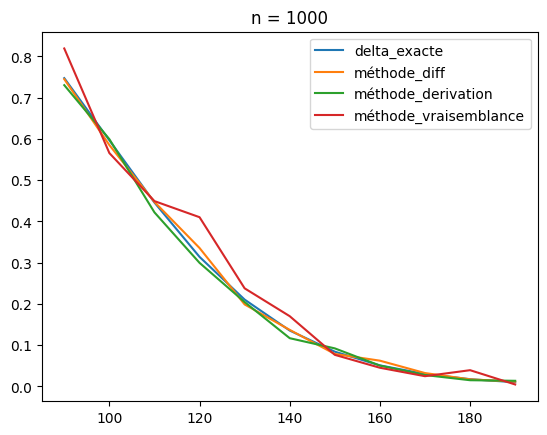

In [6]:
K_ = [k for k in range(90 , 200 , 10)]
res_0 = [calcul_delta(sigma , T , spot , k , r) for k in K_ ]
res_diff = [mehode_differance_fin(spot , n , T   , r , sigma , k , n**(- 1/4)) for k in K_ ]
res_derivation = [methode_derivation(n ,T , r , sigma , spot , k) for k in K_ ]
res_vraisem = [methode_rapport_vraisemblanc(T , n , spot , r , sigma , k) for k in K_ ]

plt.plot(K_ , res_0 , label="delta_exacte")
plt.plot(K_ , res_diff , label="méthode_diff")
plt.plot(K_ , res_derivation , label="méthode_derivation")
plt.plot(K_ , res_vraisem , label="méthode_vraisemblance")
plt.legend()
plt.title(f"n = {n}")
plt.show()



### Question 3 : 

/tmp/ipykernel_26392/1286056842.py:24: RuntimeWarning: invalid value encountered in scalar divide
  return (alpha_1 - alpha_2)*np.exp(-r*T) / (2*epsilon*n)


0.5967717843205244


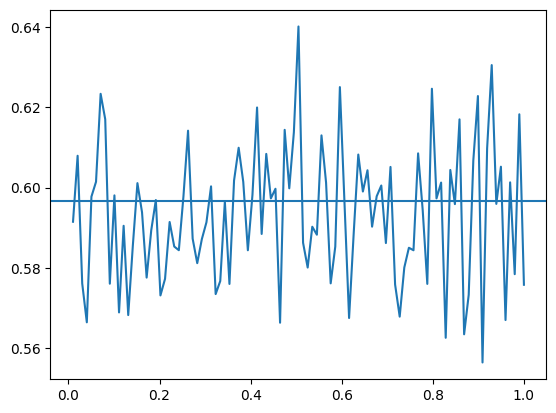

In [13]:
# stabilite : 

epsilon_ = np.linspace(0,1 , 100)
res_0 = calcul_delta(sigma , T , spot , K , r)
res_diff_e = [mehode_differance_fin(spot , n , T   , r , sigma , K , e ) for e in epsilon_ ]
plt.plot(epsilon_ , res_diff_e ,label="delta_diff_fini")
plt.axhline(res_0 , label="delta_exacte")
print(res_0)
plt.show()

